### About GeoIQ

GeoIQ is a leading location intelligence platform that leverages its AI and ML capabilities to provide critical information regarding locations, people, their behaviours, businesses, and their potential. The company’s machine learning engine identifies the ‘why’ behind the ‘where’, thus unlocking patterns in business data.

### Introduction


While there’s no doubt that machine learning (ML) can be a great tool for businesses of all shapes and sizes, actually building ML models can seem daunting at first. GeoIQ automl python package helps you build ML models that are tailored to your specific needs, without needing deep ML expertise.

AutoML solutions provide a user interface that walks you through each step of model building, including importing data, training your model on the data, evaluating model performance, and predicting values with the model. But, what if you want to use AutoML products outside of the user interface? If you’re working with structured data, one way to do it is by using the AutoML python package, which lets you trigger-or even automate-each step of the process through code. 

In this notebook, we'll use an example to show how you can use the package from end-to-end within your Jupyter Notebook. Jupyter Notebooks are one of the most popular development tools for data scientists. They enable you to create interactive, shareable notebooks with code snippets and markdown for explanations, so you can leverage the power of AutoML technology.

There are several benefits of using AutoML technology from a notebook. Each step and setting can be codified so that it runs and customized according to your need. Also, it's common, even with AutoML, to need to manipulate the source data before training the model with it. By using a notebook, you can use common tools like pandas and numpy to preprocess the data in the same workflow. Finally, you have the option of creating a model with another framework, and ensemble that together with the AutoML model, for potentially better results. 

Let's get started!

### Installation

You can pip install your package with this URL like this:

In [ ]:
!pip install git+https://github.com/geoiq-io/geoiq_automl_us.git

### API key generation

Generated API keys can be used for real time prediction pipelines. The steps for generating API keys for AutoML in the GeoIQ platform.

1. Sign up to our GeoIQ automl platform [geoiq_automl](https://auth.geoiq.io/in/login?redirect_uri=https%3A%2F%2Fautoml.geoiq.io%2Fin)

2. Navigate to management [console](https://console.geoiq.io/in/home)



 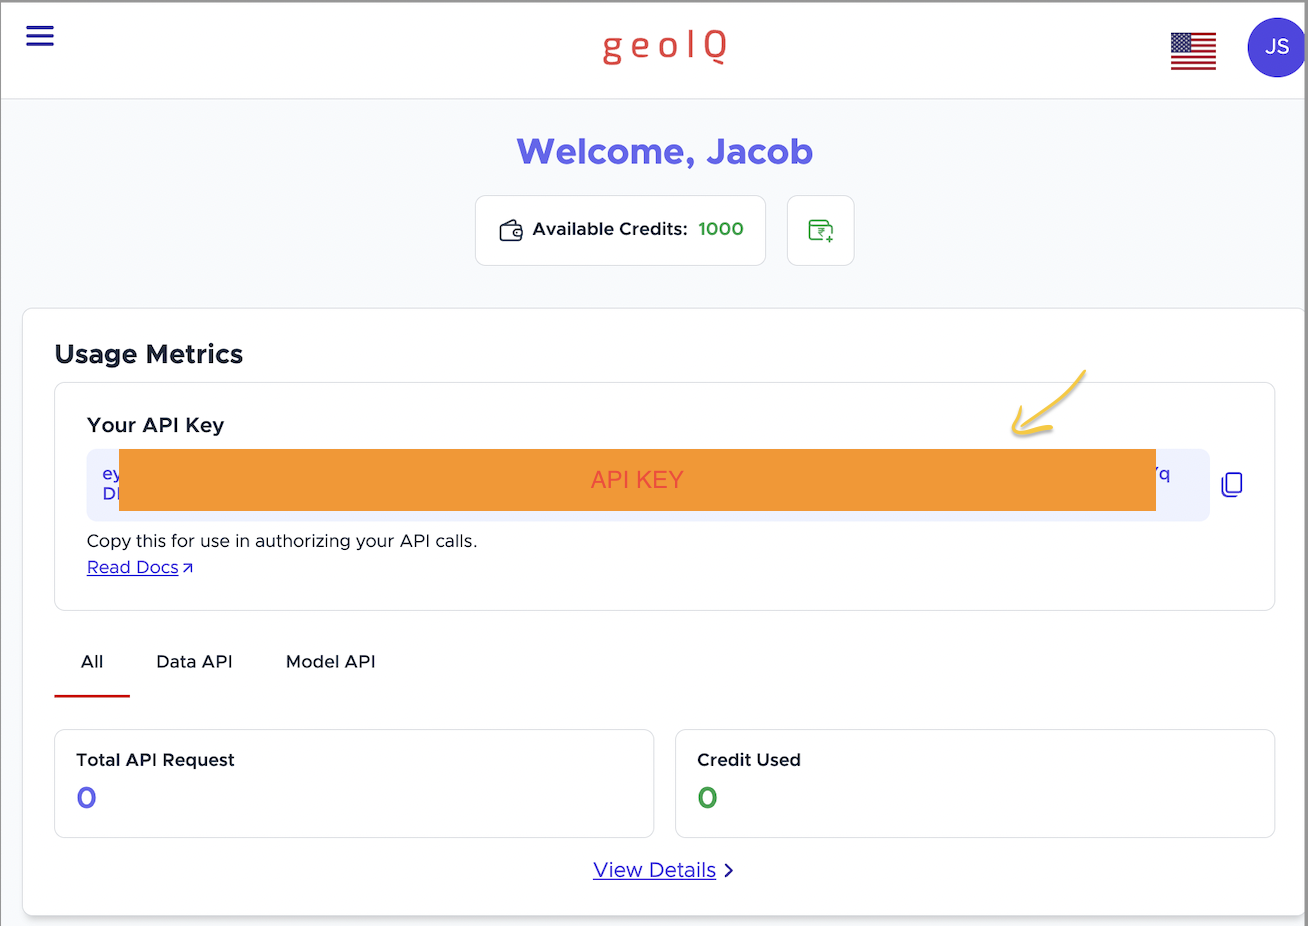

An API key is generated. Copy the API key and store it in a safe place.

In [1]:
## Import the required packages

import pandas as pd
import geoiq_automl_us

In [2]:
# Set the API key as a string variables.
# your_key = '******************************'


Our Python library is designed to simplify the process of accessing the GeoIQ API within a Python script. Instantiating an geoiq_automl object requires an GeoIQ API key (which can be obtained by following above steps)

In [3]:
#### GeoQI automl object
result = geoiq_automl_us.automl(your_key)

AutoML object is created at 2023-03-16 15:00:57.803315


### Import Data

The first step is to create a dataset id, which is essentially a unique identifier for the data in the geoiq automl platform.

In [19]:
#Reading a local data file to a dataframe

df_lat_lng = pd.read_csv('sample-us-election-win-prediction-democrats.csv')
df_address = pd.read_csv('us_address_test.csv') 

### Data prepration

#### Using latitude and longitude to identify the location **(geocoding  = false)**

In [20]:
df_lat_lng.head()

,Unnamed: 0,longitude,latitutde,winner
0,141799,-89.242050,42.928863,1
1,84263,-77.636602,43.190089,1
2,129139,-97.346540,28.306127,0
3,134814,-122.316742,47.625186,1
4,95369,-73.687094,41.017616,1


In [26]:
df_lat_lng.shape

(100000, 4)

In [22]:
# dataset_id : The ID for the dataset that you want to create. This ID is unique in the geoiq automl platform.

dataset_id = result.create_dataset(df_lat_lng, dataset_name ='us_election_data' ,
                                   dv_col = 'winner', dv_positive = '1',latitude_col = "latitutde" ,
                                   longitude_col = "longitude",unique_col = 'Unnamed: 0',geocoding = 'f',
                                   address_col = '', pincode_col = '' , additional_vars = [])

{"data":{"dataset_id":"3a2ee5ce-4726-4dc8-a30f-75b10dd07f9c","message":"Dataset creation started successfully.","status":"In progress"}}



**describe_dataset** helps you to see the progess of the dataframe you have uploaded on the geoiq automl platform <br /> 
Stage1: Creating GeoIQ variables<br /> 
Stage2: Exploratory Analysis in progress<br /> 
Stage3: Completed <br /> 

In [31]:
# Return the progress and information on the dataset

result.describe_dataset(dataset_id)

Dataset creation is completed for this dataset id 3a2ee5ce-4726-4dc8-a30f-75b10dd07f9c


[]

#### Using addresses to identify the location **(geocoding  = true)**

In [9]:
df_address.head()

,idcol,address,dv
0,0,"SOUTHEAST HEALTH MEDICAL CENTER, 1108 ROSS CLA...",0
1,1,"NORTH JACKSON HOSPITAL, 47005 U S HIGHWAY 72, ...",0
2,2,"MARSHALL MEDICAL CENTERS SOUTH CAMPUS, 2505 U ...",0
3,3,"HARTSELLE MEDICAL CENTER, 201 PINE STREET NORT...",1
4,4,"MARSHALL MEDICAL CENTER NORTH, 8000 ALABAMA HI...",0


In [10]:
df_address.shape

(2109, 3)

In [12]:
dataset_id = result.create_dataset(df_address, dataset_name ='sample_us_address_data' ,dv_col = 'dv', 
                                   dv_positive = '1',latitude_col = "" , longitude_col = "",
                                   unique_col ='idcol',geocoding = 't',address_col = 'address', 
                                   pincode_col = '' , additional_vars = [])

{"data":{"dataset_id":"4f4304c4-775e-43cd-b26d-5aa5627bde78","message":"Dataset creation started successfully.","status":"In progress"}}



**describe_dataset** helps you to see the progess of the dataframe you have uploaded on the geoiq automl platform <br /> 
Stage1: Geocoding the address (if geocoding = True) <br /> 
Stage2: Creating GeoIQ variables<br /> 
Stage3: Exploratory Analysis in progress<br /> 
Stage4: Completed <br /> 

In [29]:
result.describe_dataset(dataset_id)

Dataset creation is completed for this dataset id 3a2ee5ce-4726-4dc8-a30f-75b10dd07f9c


[]

#### Dataset Info

The **dataset_info()** method prints information about the dataset.

In [32]:
result.dataset_info(dataset_id)

{'address_col': None,
 'created_at': '2023-03-16 15:16:28',
 'data_path': 'https://geoiq-automl-us.s3.us-west-2.amazonaws.com/6adfe02a-cc00-461a-b789-8f77dc498ac9/csv/e99d49ee17284f3aaaa6e8e4ec7f9655.csv',
 'data_size': 3.052,
 'data_type': 'csv',
 'dv_col': 'winner',
 'dv_col_id': 'ffb4b40b-3222-4d2b-b995-4059d9595b13',
 'dv_positive': '1',
 'dv_rate': 52.7,
 'geocoding': False,
 'id': '3a2ee5ce-4726-4dc8-a30f-75b10dd07f9c',
 'identifier_col': 'Unnamed: 0',
 'is_defined': True,
 'is_sample': False,
 'lat_col': 'latitutde',
 'lng_col': 'longitude',
 'name': 'us_election_data',
 'number_of_categorical': 0,
 'number_of_columns': 4,
 'number_of_numerical': 4,
 'number_of_rows': 100000,
 'number_of_rows_geoiq': 100000,
 'pincode_col': None,
 'remarks': None,
 'status': 'Completed',
 'total_dv_rate': 52.7,
 'updated_at': '2023-03-16 15:55:11',
 'user_selected_vars': []}

### Manage your datasets

A project can have multiple datasets. You can get a list of the available datasets and can delete datasets you no longer need.

#### List of all datasets

In [33]:
result.list_datasets()

,id,name,status,url
0,3a2ee5ce-4726-4dc8-a30f-75b10dd07f9c,us_election_data,Completed,https://automl.geoiq.io/us/dataset/3a2ee5ce-47...
1,4f4304c4-775e-43cd-b26d-5aa5627bde78,sample_us_address_data,Completed,https://automl.geoiq.io/us/dataset/4f4304c4-77...


In [34]:
all_datasets = result.list_datasets()

#### Delete the datasets

In [25]:
result.delete_dataset(all_datasets['id'][0])

Dataset deleted successfully


### EDA

Exploratory Data Analysis (EDA), also known as data exploration, is a step in the data analysis process, where a number of techniques are used to better understand the dataset being used.

In [35]:
## Returned dataframe is descendingly sorted on the basis of IV
result.eda(dataset_id)

,column_name,column_type,iv,auc_1,auc_2,auc_3,bins,catchment,category,F_test_pvalue,...,max_ks,mean,name,normalization_level,roc,sd,sub_category_name,unique,unique_count,variable
0,acs5_19_bg_hh_renter_ocupied_1000,FLOAT,1.728,0.754,0.811,0.824,10.0,1000,Occupancy Status - catchment 1000 m,0.0,...,0.508,2.477155e+03,acs5_19_bg_hh_renter_ocupied,Normalization NA,,8.001401e+03,Tenure of Housing Units- Renter Occcupied,,11976.0,
1,acs5_19_bg_tot_indiv_income_f_1000,FLOAT,1.713,0.759,0.812,0.825,10.0,1000,Earnings by Sex - catchment 1000 m,0.0,...,0.519,1.500644e+03,acs5_19_bg_tot_indiv_income_f,Normalization NA,,3.575207e+03,Earnings among Female Population,,9600.0,
2,acs5_19_bg_agg_indiv_income_f_other_1000,FLOAT,1.708,0.762,0.816,0.827,10.0,1000,Aggregate Earnings - catchment 1000 m,0.0,...,0.523,-1.517293e+04,acs5_19_bg_agg_indiv_income_f_other,Normalization NA,,1.247865e+08,Aggregate Earnings- Female Part Time Employees,,95271.0,
3,acs5_19_bg_agg_indiv_income_f_1000,FLOAT,1.702,0.762,0.816,0.827,10.0,1000,Aggregate Earnings - catchment 1000 m,0.0,...,0.524,5.618971e+07,acs5_19_bg_agg_indiv_income_f,Normalization NA,,5.119069e+08,Aggregate Earnings - Female Population,,97081.0,
4,acs5_19_bg_tot_indiv_income_1000,FLOAT,1.697,0.758,0.811,0.826,10.0,1000,Earnings by Sex - catchment 1000 m,0.0,...,0.517,3.084062e+03,acs5_19_bg_tot_indiv_income,Normalization NA,,7.200839e+03,Total Earnings by Sex,,13983.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5644,psus_pt_no_of_private_schl_1000,FLOAT,0.000,0.618,0.621,0.621,1.0,1000,"High Schools, Middle Schools and Elementary Sc...",0.0,...,0.000,3.860000e-01,psus_pt_no_of_private_schl,Normalization NA,,1.172000e+00,Private Schools,,22.0,
5645,psus_pt_no_of_private_schl_500,FLOAT,0.000,0.546,0.546,0.546,1.0,500,"High Schools, Middle Schools and Elementary Sc...",0.0,...,0.000,1.030000e-01,psus_pt_no_of_private_schl,Normalization NA,,4.460000e-01,Private Schools,,13.0,
5646,nces_20_pt_clg_fulltime_grad_out_of_state_stdn...,FLOAT,0.000,0.501,0.501,0.501,1.0,200,Higher Education - catchment 200 m,0.0,...,0.000,2.130000e+00,nces_20_pt_clg_fulltime_grad_out_of_state_stdn...,Normalization NA,,8.285500e+01,Tuition Fees,,118.0,
5647,nces_20_pt_clg_fulltime_grad_out_of_state_stdn...,FLOAT,0.000,0.508,0.508,0.508,1.0,500,Higher Education - catchment 500 m,0.0,...,0.000,9.880000e+00,nces_20_pt_clg_fulltime_grad_out_of_state_stdn...,Normalization NA,,1.624470e+02,Tuition Fees,,408.0,


#### EDA graphs

The histograms below show us the distribution and frequency of the GeoIQ variable with dependent variable

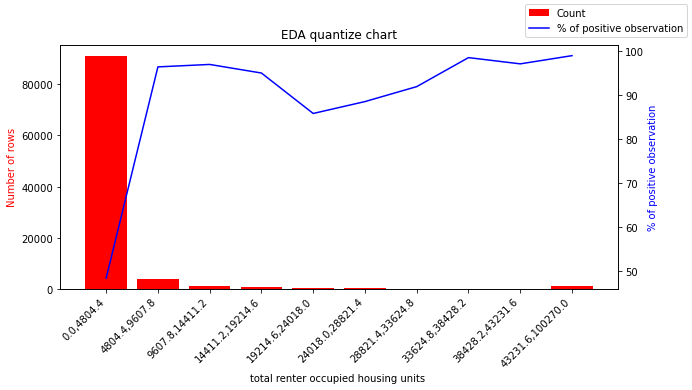

In [36]:
result.variable_distribution_plot(dataset_id,
                                  'acs5_19_bg_hh_renter_ocupied_1000',
                                  quantize=True)

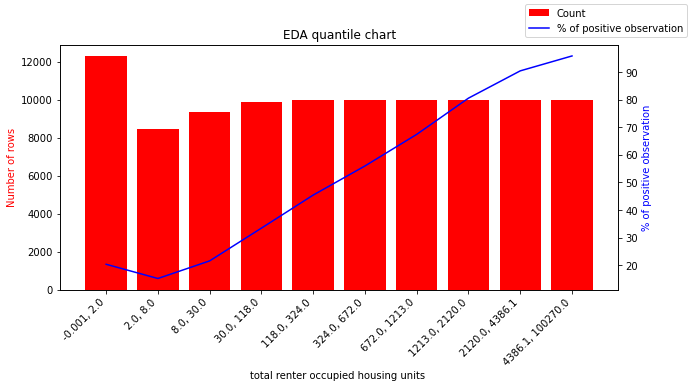

In [37]:
result.variable_distribution_plot(dataset_id,
                                  'acs5_19_bg_hh_renter_ocupied_1000',
                                  quantize=False)

### Datset Enrichment

**data_enrichment** function allows you to download the geoiq variables for your dataset.
GeoIQ [credits](https://console.geoiq.io/us/credits) are required to avail this functionality.<br />
If you have a sufficient credit a link to download the required data will be returned.

In [35]:
result.data_enrichment(dataset_id,                     
                       ['cn_mbl_int_spd_lt_500',
                        'acs5_19_indiv_income_f_20000_to_22499_blockgroup',
                        'acs5_19_hh_built_1950_to_1959_blockgroup'])

Not enough credits to download the GeoIQ vars data.


### Modelling

#### Model List for single dataset

In [45]:
result.list_models(dataset_id)

,dataset_id,model_id,model_name,status,url
0,3a2ee5ce-4726-4dc8-a30f-75b10dd07f9c,642ce87e-0fcb-45e2-a606-2818df800f26,us_election_data - model,In progress,https://automl.geoiq.io/us/model/642ce87e-0fcb...
1,3a2ee5ce-4726-4dc8-a30f-75b10dd07f9c,708ab84d-5397-4043-9114-16588d451e34,us_election_model,In progress,https://automl.geoiq.io/us/model/708ab84d-5397...


In [39]:
all_models = result.list_models(dataset_id)

## Get_all_models

**Baseline Model**

In [40]:
# The first model created automatically
default_model_id = result.list_models(dataset_id).tail(1).reset_index(drop=True)['model_id'][0]

#### Custom model

Create your own custom test/train/validation split and specify the column to use for the split

In [41]:
new_model = result.create_custom_model( dataset_id=dataset_id,model_name="us_election_model",
                                       model_type = "xgboost", split_ratio ="[0.8,0.2,None]")

In [42]:
new_model

'708ab84d-5397-4043-9114-16588d451e34'

In [43]:
result.describe_model(new_model)

{'last_updated_time': 1678962810.474753,
 'model_id': '708ab84d-5397-4043-9114-16588d451e34',
 'model_name': 'us_election_model',
 'progress_stage': '50',
 'stage': '1',
 'status_text': 'Creating model'}

### Evaluate the model

After training has been completed, you can review various performance statistics on the model, such as the IV, AUC, KS, and so on. The metrics are returned in a dataframe, and here we can also visualize the lift and ROC chart

#### Model Summary

In [15]:
model_id = result.list_models(dataset_id)['model_id'][0]

In [45]:
result.model_summary(model_id)

## Json output

,name,started_at,completed_at,dv_col,dv_rate,model_comments,variable_count,iv_holdout,iv_train,holdout_auc,train_auc,holdout_ks,train_ks
0,sample_us_address_data - model,2023-03-16 12:02:45,2023-03-16 12:03:35,dv,0.503,"[Try uploading more number of rows., Ensure en...",161,0.086,0.085,0.54,0.567,0.097,0.102


#### Lift Chart

Lift is the ratio of the number of positive observations up to decile i using the model to the expected number of positives up to that decile i based on a random model. 
Lift chart is the chart between the lift on the vertical axis and the corresponding decile on the horizontal axis.


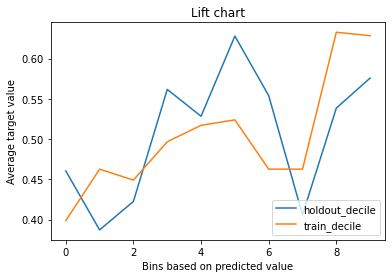

In [46]:
result.create_lift_chart(model_id)

#### AUC-ROC Chart

1. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
2. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

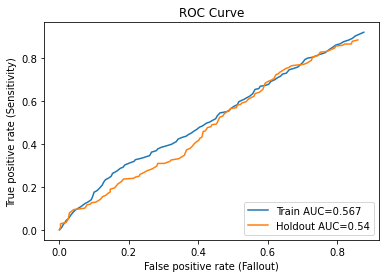

In [47]:
result.create_roc_chart(model_id)

#### Feature Importance

In [48]:
result.get_feature_importance(model_id)

,catchment,category,column_name,column_uuid_id,desc_name,description,id,importance_val,is_geoiq_var,major_category,name,normalization_level,sub_category_name
0,None,Population,acs5_19_pop_2_or_more_race_blockgroup,1f8e39ed-32fd-4681-b219-b0a24b2dc7de,Total Population by Sex and Age- Two or More R...,Total Population by Sex and Age- Two or More R...,6349,100.00,True,Demography,acs5_19_pop_2_or_more_race_blockgroup,Normalization NA,"Population by Race, Sex and Age- Two or More R..."
1,None,Occupancy Status,acs5_19_hh_vacant_blockgroup,b32784d1-09df-430c-89f9-8363efd13555,Total Vacant Housing Units,Total Vacant Housing Units,6254,88.91,True,Socio-economic,acs5_19_hh_vacant_blockgroup,Normalization NA,Vacant Housing Units
2,500,Population - catchment 500 m,cen_10_bk_demo_pct_tot_65_n_66_yr_500,63857801-ffb2-4398-bcf7-5149ee0dc32b,Percentage of Total Population between 65 and ...,Percentage of Total Population between 65 and ...,2770,82.32,True,Demography,cen_10_bk_demo_pct_tot_65_n_66_yr,Normalization NA,Population by Sex and Age
3,None,Population,acs5_19_pop_f_70_to_74_yr_blockgroup,1593d573-5192-4e3a-94d8-ecfb0f540a20,Female Population between 70 and 74 years,Female Population between 70 and 74 years,6328,69.88,True,Demography,acs5_19_pop_f_70_to_74_yr_blockgroup,Normalization NA,Female Population 75 years and above
4,500,Population - catchment 500 m,cen_10_bk_demo_pct_tot_f_35_to_39_yr_500,97f79120-5345-469f-bfa1-4642454fbdf1,Percentage of Female Population between 35 and...,Percentage of Female Population between 35 and...,2738,69.00,True,Demography,cen_10_bk_demo_pct_tot_f_35_to_39_yr,Normalization NA,Female Population between 25- 49 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1000,Population - catchment 1000 m,cen_10_bk_demo_pct_tot_f_1000,a159d928-6216-45a7-a9b2-74d33cc4b8c6,Percentage of Total Female Population by Age,Percentage of Total Female Population by Age,2727,0.00,True,Demography,cen_10_bk_demo_pct_tot_f,Normalization NA,Total Female Population
157,1000,Structures based on Years Built - catchment 10...,acs5_19_bg_hh_built_1970_to_1979_1000,b86570ed-2e16-4d3b-a69a-1ba262a80f92,Total Structures built between 1970 to 1979,Total Structures built between 1970 to 1979,3054,0.00,True,Infrastructure,acs5_19_bg_hh_built_1970_to_1979,Normalization NA,Built between 1970 to 1999
158,None,Employment Status by Age and Sex,acs5_19_tot_emp_blockgroup,5e3e0d1f-764e-4d54-85a1-5ed76a0f8823,"Estimated Total Population by Sex, age and emp...","Estimated Total Population by Sex, age and emp...",6445,0.00,True,Demography,acs5_19_tot_emp_blockgroup,Normalization NA,Employment Status of Population Over 16 years
159,None,Structures based on Years Built,acs5_19_hh_built_1980_to_1989_blockgroup,8e710baa-be48-4444-a87b-51c6d6ae678c,Total Structures built between 1980 to 1989,Total Structures built between 1980 to 1989,6280,0.00,True,Infrastructure,acs5_19_hh_built_1980_to_1989_blockgroup,Normalization NA,Built between 1970 to 1999


#### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [49]:
result.get_confusion_matrix(dataset_id,model_id,0.4)

## If threshold =None , It is optimal threshold for max F1 score, 


,accuracy,f1_score,fn,fp,fpr,mcc,npv,precision_val,sensitivity_val,threshold,tn,tnr,tp
0,0.5428,0.60435,227,446,0.61012,0.08769,0.55664,0.53542,0.69366,0.4,285,0.38988,514


#### Gains Table

 1. Gain table is used to evaluate performance of classification model. 
 2. It measure how much  better one can expect to do with the predictive model comparing without a model.

In [50]:
result.get_gains_table(model_id,split='train')

,Decile,Score Range,Non-positive Class Count,Positive Class Count,KS,Positive Class Percentage
0,0,"(0.0371, 0.196]",89,59,0.04213,0.39865
1,1,"(0.196, 0.272]",79,68,0.05843,0.46259
2,2,"(0.272, 0.354]",81,66,0.08017,0.44898
3,3,"(0.354, 0.437]",74,73,0.08289,0.49660
4,4,"(0.437, 0.5]",71,76,0.07745,0.51701
5,5,"(0.5, 0.557]",70,77,0.06929,0.52381
6,6,"(0.557, 0.632]",79,68,0.08560,0.46259
7,7,"(0.632, 0.713]",79,68,0.10190,0.46259
8,8,"(0.713, 0.809]",54,93,0.05027,0.63265
9,9,"(0.809, 0.966]",55,93,0.00000,0.62838


### Manage your models

A project can have multiple models. You can get a list of the available models and can delete models you no longer need.

#### List of all models

In [51]:
result.list_models(dataset_id)

,dataset_id,model_id,model_name,status,url
0,4f4304c4-775e-43cd-b26d-5aa5627bde78,c2b7b9d2-166d-49ce-8bc1-91b7039843d3,sample_us_address_data - model,Completed,https://automl.geoiq.io/us/model/c2b7b9d2-166d...
1,4f4304c4-775e-43cd-b26d-5aa5627bde78,37d9b108-79bc-4209-a121-2d442620f039,sample_us_address_new_model,Completed,https://automl.geoiq.io/us/model/37d9b108-79bc...


#### Delete the models

In [ ]:
result.delete_model(model_id)

### Validation

#### Create validation dataset

In [5]:
validation_df = pd.read_csv('validation_dataset.csv')

In [6]:
validation_df.head()

,idcol,address,dv
0,1500,"UNIV OF SO ALA/DEPT OF PHYSI THERAPY, 1504 SPR...",0
1,1501,"COMPREHENSIVE REHABILITATION OF AL INC, 3300 C...",0
2,1502,"ANNISTON REHABILITATION CENTER INC, 1001 B LEI...",1
3,1503,"DCH SPEECH AND HEARING CLINIC INC, 701 UNIVERS...",0
4,1504,"REHABCARE, 235 INVERNESS CENTER DRIVE, APT 148...",1


In [11]:
validation_dataset_id = result.create_validation_dataset(validation_df,
                                                         model_id,
                                                         dataset_id,
                                                         name ='validation_dataset', 
                                                         dv_col='dv',
                                                         dv_positive='1',
                                                         geocoding = 't',
                                                         address = 'address', 
                                                         pincode = '', 
                                                         unique_col = 'idcol' )

{"data":{"message":"Validation Dataset creation started successfully.","status":"In progress","validation_dataset_id":"665c8828-1d06-4de6-8e2a-1253891b6244"}}



#### Validation dataset progress

In [19]:
result.list_validation_datasets(model_id)

,created_at,dataset_name,id,status,updated_at
0,"16 March, 2023 08:38:1678955927",validation_dataset,665c8828-1d06-4de6-8e2a-1253891b6244,Completed,"16 March, 2023 08:50:1678956601"


### Evaluate validation dataset

#### Validation lift chart

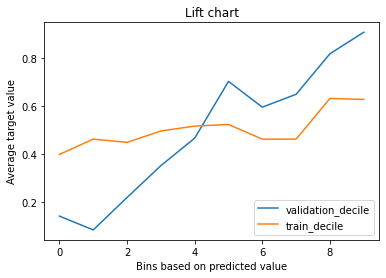

In [20]:
result.create_validation_lift_chart(validation_dataset_id)

#### Validation ROC chart

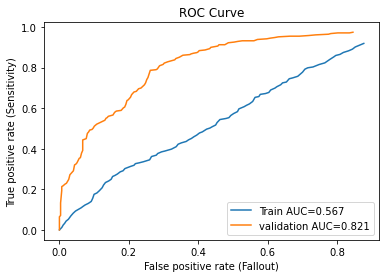

In [17]:
result.create_validation_roc_chart(validation_dataset_id)

#### Validation gains table

In [22]:
result.get_validation_gains_table(validation_dataset_id,split = 'train')

,Decile,Score Range,Non-positive Class Count,Positive Class Count,KS,Positive Class Percentage
0,0,"(0.0371, 0.196]",89,59,0.04213,0.39865
1,1,"(0.196, 0.272]",79,68,0.05843,0.46259
2,2,"(0.272, 0.354]",81,66,0.08017,0.44898
3,3,"(0.354, 0.437]",74,73,0.08289,0.49660
4,4,"(0.437, 0.5]",71,76,0.07745,0.51701
5,5,"(0.5, 0.557]",70,77,0.06929,0.52381
6,6,"(0.557, 0.632]",79,68,0.08560,0.46259
7,7,"(0.632, 0.713]",79,68,0.10190,0.46259
8,8,"(0.713, 0.809]",54,93,0.05027,0.63265
9,9,"(0.809, 0.966]",55,93,0.00000,0.62838


#### Validation PSI table

Population stability Index (PSI) is a model monitoring metric that is used to quantify how much the distribution of a continuous response variable has changed between two given samples

In [23]:
result.get_validation_psi_table(validation_dataset_id)

,decile_vals,psi_values,train_count,train_percentage,validation_count,validation_percentage
0,0,0.00686,148,0.10054,78,0.12850
1,1,0.00485,147,0.09986,48,0.07908
2,2,0.00030,147,0.09986,64,0.10544
3,3,0.00126,147,0.09986,54,0.08896
4,4,0.00767,147,0.09986,45,0.07414
5,5,0.00126,147,0.09986,54,0.08896
6,6,0.00218,147,0.09986,52,0.08567
7,7,0.00001,147,0.09986,60,0.09885
8,8,0.00323,147,0.09986,72,0.11862
9,9,0.00846,148,0.10054,80,0.13180


#### List of all validation dataset

In [24]:
result.list_validation_datasets(model_id)

,created_at,dataset_name,id,status,updated_at
0,"16 March, 2023 08:38:1678955927",validation_dataset,665c8828-1d06-4de6-8e2a-1253891b6244,Completed,"16 March, 2023 08:50:1678956601"


#### Batch Prediction

After you have created (trained) a model, you can make an asynchronous request for a batch of predictions using the batch predict method. You supply input data to the batchPredict method, in table format. Each row provides values for the features you trained the model to use. The batch predict method sends that data to the model and returns predictions for each row of data.

In [18]:
result.batch_prediction_download(validation_dataset_id)

'https://geoiq-automl-us.s3.us-west-2.amazonaws.com/6adfe02a-cc00-461a-b789-8f77dc498ac9/models/c2b7b9d2-166d-49ce-8bc1-91b7039843d3/validation_datasets/GeoIQ_665c8828-1d06-4de6-8e2a-1253891b6244_prediction.csv'

### Deployment

 After you have created (trained) a model, you can deploy the model and request online (real-time) predictions. Online predictions accept one row of data and provide a predicted result based on your model for that data. You use online predictions when you need a prediction as input for your business logic flow.

Before you can request an online prediction, you must deploy your model. Deployed models incur GeoIQ [credits](https://console.geoiq.io/us/credits). 

#### Check for the model endpoint

In [50]:
result.get_deployed_model_endpoint(model_id)

,created_at,dataset_name,endpoint_id,model_name,url_endpoint,user_var_list
0,2023-03-16 14:55:41,sample_us_address_data,b74a8bb2-3687-4054-9457-88c4c254087b,sample_us_address_data - model,https://ml-us.geoiq.io/model/v1.0/c2b7b9d2-166...,[]


#### Create model endpoint

This step takes around 30 to 60 seconds

In [49]:
result.create_deployed_model_endpoint(model_id)

,created_at,dataset_name,endpoint_id,model_name,url_endpoint,user_var_list
0,2023-03-16 14:55:41,sample_us_address_data,b74a8bb2-3687-4054-9457-88c4c254087b,sample_us_address_data - model,https://ml-us.geoiq.io/model/v1.0/c2b7b9d2-166...,[]


In [56]:
deployed_url = result.get_deployed_model_endpoint(model_id)['url_endpoint'][0]

#### Model Score

In [57]:
import requests
url = deployed_url
json_data = {
'lat':40.7579747,
'lng':-73.9855426,
'key':your_key
}
response = requests.request("POST", url, json= json_data)
response.json()

{'score': 0.7528, 'status': 200}

#### Model variable for new lat long

**get_model_var** function allows you to see the geoiq features select in the model.
GeoIQ [credits](https://console.geoiq.io/us/credits) are required to avail this functionality.

In [58]:
result.get_model_var(40.7579747,-73.9855426,model_id)

,cen_10_bk_demo_tot_f_80_to_84_yr_1000,cen_10_bk_tot_oth_vacant_1000,cen_10_bk_tot_owner_occup_hhlder_who_is_wht_1000,cen_10_bk_social_total_hhlder_15_to_64_yr_family_hh_oth_family_m_hhlder_no_wife_present_no_rel_child_under_18_yr_1000,acs5_19_bg_pop_f_5_to_9_yr_1000,acs5_19_bg_pop_f_10_to_14_yr_1000,acs5_19_bg_hh_income_45000_to_49999_1000,acs5_19_bg_agg_indiv_income_f_1000,acs5_19_bg_tot_emp_m_20_n_21_yr_in_lab_force_civilian_1000,acs5_19_bg_median_earn_sale_n_ofc_ocu_1000,...,hsa_total_cases_2018_zipcode,o_poi_park_500,cen_10_bk_tot_renter_occup_hhlder_who_is_2_or_more_race_200,cen_10_bk_social_hh_type_by_age_of_hhlder_total_200,acs5_19_bg_pop_m_amer_ind_n_alaska_nat_200,acs5_19_bg_pop_wht_not_hisp_or_latin_200,acs5_19_bg_agg_indiv_income_m_200,cen_10_bk_demo_pct_tot_m_200,acs5_19_bg_hh_avg_no_of_rom_200,cn_mbl_int_spd_u_200
0,458,545,3513,411,385,315,593,1169261625,286,10187,...,868,0,29,764,6,1048,30552066,62.7,2668,32
